# Gradiant Descent Stochastic (SGD) from scratch with Numpy

This method adjust iteratively model parameters by using each time unique sample

## Data Generation

Let's start by creating artificial linear data where we will add random noise

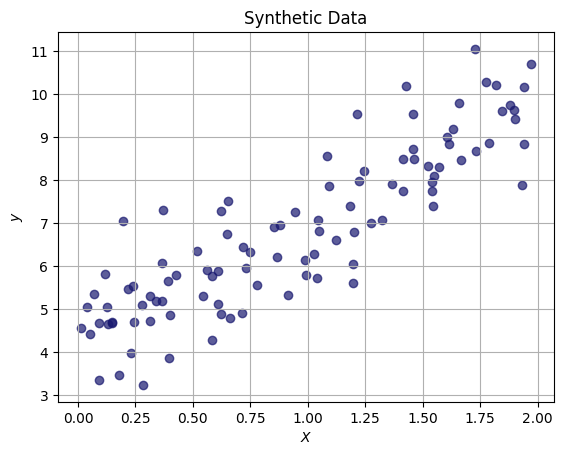

In [30]:
import numpy as np 
import matplotlib.pyplot as plt 

np.random.seed(42)

n_samples = 100
X = 2 * np.random.rand(n_samples, 1)
y = 4 + 3 * X + np.random.randn(n_samples, 1) 

plt.scatter(X, y, alpha=0.7, color= "midnightblue") 
plt.title("Synthetic Data")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.grid(True)
plt.show()

## Model Set up

We set up model parameters with random values:
- Weights (slope)
- Bias (intercept)

In [31]:
w = [0]
b = [0]

print(f"Initial weight: {w[0]:.2f}, Initial bias: {b[0]:.2f}")

Initial weight: 0.00, Initial bias: 0.00


In [32]:
# Initialisation des poids et biais
w = [0]
b = [0]

print(f"Initialisation : poids (w) = {w[0]:.2f}, biais (b) = {b[0]:.2f}")

Initialisation : poids (w) = 0.00, biais (b) = 0.00


# Stochastic Gradient Descent

For each epoch, we take each sample (in random order), calculate its gradient, and immediately update the parameters:

## Formulas:

```python
θ = θ - α * ∇J(θ)
```

Where:
- `θ` represents the model parameters (weights and bias).
- `α` is the learning rate.


In [33]:
# Hyperparameters
eta = 0.001         # learning rate
epochs = 30         # number of passes over the data

# Loss history tracking
loss_history = []

for epoch in range(epochs):
    # Shuffle indices at the beginning of each epoch
    indices = np.random.permutation(n_samples)
    
    for idx in indices:
        # Process each example exactly once (as sklearn does)
        xi = X[idx:idx+1]  # keeping 2D dimension for prediction
        yi = y[idx] # scalar result in array of shape (1,)
        
        # Prediction (for linear model y = w^T x + b)
        # If w is a vector of size (n_features,), we can do:
        y_pred = xi.dot(w) + b  # résultat scalaire dans un array de shape (1,)
        
        # Gradient calculation for MSE: ∂/∂w ( (y - w^T x - b)^2 ) = -2 * x * (y - y_pred)
        # Note on sign: we do w <- w - eta * grad
        # Here grad = -2 * xi * (yi - y_pred), can also write dw = 2 * xi * (y_pred - yi)
        error = (y_pred - yi)   # scalar in array
        dw = 2 * xi.flatten() * error  # vector of size n_features
        db = 2 * error # scalar
        
        # Parameter updates
        w -= eta * dw
        b -= eta * db

    # Calculate and record loss on the entire dataset
    # vectorized global prediction
    y_all_pred = X.dot(w) + b
    loss = np.mean((y - y_all_pred) ** 2)
    loss_history.append(loss)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} – Loss: {loss:.4f}")

Epoch 1/30 – Loss: 24.8493
Epoch 10/30 – Loss: 7.4537
Epoch 20/30 – Loss: 7.1287
Epoch 30/30 – Loss: 6.8366


# Convergence Visualisation

We observe the evolution of loss across epochs to verify our algorithm's convergence:

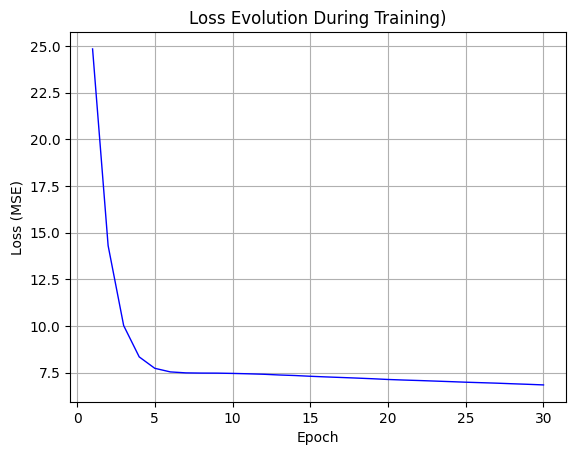

In [34]:
plt.plot(range(1, epochs + 1), loss_history, linewidth=1, color='blue')
plt.title("Loss Evolution During Training)")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()

## Results obtained 

Here's our final line compared to the real data:

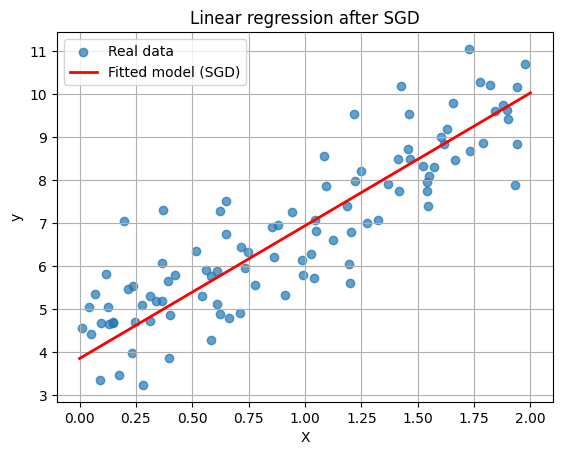

Final parameters: weight (w) = 3.09, bias (b) = 3.85


In [35]:
plt.scatter(X, y, alpha=0.7, label="Real data")
X_plot = np.linspace(0, 2, 100)
y_plot = w * X_plot + b
plt.plot(X_plot, y_plot, color='red', linewidth=2, label="Fitted model (SGD)")

plt.title("Linear regression after SGD")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final parameters: weight (w) = {w[0]:.2f}, bias (b) = {b[0]:.2f}")

# Key Takeaways

1. Stochastic Gradient Descent (SGD) updates model parameters after each individual example (taken randomly), making learning fast and efficient for large databases.

2. The choice of learning rate is crucial:
   - Too high causes instability
   - Too low slows down learning

3. Monitoring the loss function helps ensure the algorithm properly converges towards an optimal solution.